In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

In [4]:
lam = 1 # Normalized wavelength
d = lam/2 # lattice constant

lambda_L = 1064*10**(-9) #wave lenght of triangular lattice beam [m] 
h_bar = 1.054571596*10**(-34) #Converted Plank const
mrb = 87*1.66053873*10**(-27) #Single atom mass of 87Rb
er = h_bar**2/(2*mrb)*(2*np.pi/lambda_L)**2 #Recoil energy of lattice

In [5]:
lambda_v = 1064*10**(-9) #wavelength for vertical lattice [m]
angle = 60 #incident angle from horizontal surface [degree]
theta = angle*np.pi/180
d_v = lambda_v / (2*np.sin(theta)) #lattice constant of vertical lattice [m]
er_v = h_bar**2*np.pi**2/(2*mrb*d_v**2) #Recoil energy of vertical lattice

n = 8 # include (2n+1)^2 plane waves in calculation <=> calculate over (2n+1)^2 bands
m = 10

In [6]:
#Quasimomentum list
q_list = [(0,0), (1/2,0), (2/3,1/3), (1/2,1/2)] #Gamma =(0,0), M = (1/2,0), K = (2/3,1/3), X = (1/2,1/2)

#Potential list
vmin = 5*er/er_v
vmax = 15*er/er_v
v_list = np.linspace(vmin,vmax,50) #Potential = 2ER - 6ER
gap_min = np.zeros(len(v_list))
gap_max = np.zeros(len(v_list))

In [7]:
Nsite = 2*n+1
H = np.zeros([Nsite, Nsite])

q = np.linspace(-1, 1,2*m+1)


C = np.zeros([Nsite, q.size, Nsite])
C0 = np.zeros([Nsite,q.size])
for i_v, v in enumerate(v_list):
    E = np.zeros([q.size, Nsite])
    tmp = np.eye(Nsite-1)
    Htmp = np.zeros([Nsite, Nsite])
    Htmp[0:Nsite-1, 1:Nsite] += -v/4 * tmp
    Htmp[1:Nsite, 0:Nsite-1] += -v/4 * tmp
    for i_q in range(q.size):
        H = np.copy(Htmp)
        for i in range(Nsite):
            H[i][i] = (2*(i-(Nsite-1)/2) + q[i_q])**2 + v/2
        
        E0, P = np.linalg.eig(H)
        C0[:,i_q] = P[:,np.argmin(E0)]
        rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
        
        E[i_q, :], P = map(list, zip(*rearrangedEvalsVecs))
        C[:, i_q, :] = np.array(P)
    gap_min[i_v] = np.min(E[:,1]-E[:,0])
    gap_max[i_v] = np.max(E[:,1]-E[:,0])
Energy = E.T

gap_min *= er_v/(2*np.pi*h_bar)*10**(-3) # unit conversion: [E_R] => [kHz]
gap_max *= er_v/(2*np.pi*h_bar)*10**(-3) 

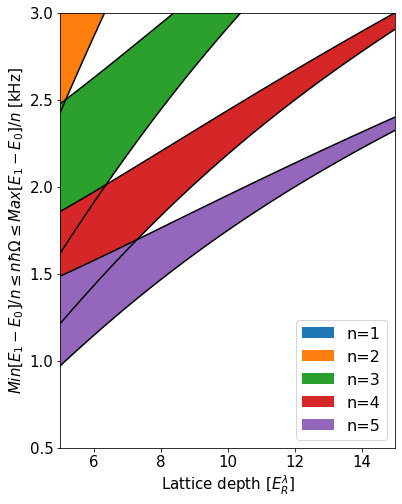

In [10]:
fig, ax = plt.subplots(figsize=[6,8])
for n in range(1,6):
    ax.plot(v_list*er_v/er,gap_min/n,v_list*er_v/er,gap_max/n,color = "black")
    ax.fill_between(v_list*er_v/er,gap_min/n,gap_max/n,label="n="+str(n))
ax.set_xlabel(r"Lattice depth $[E_R^{\lambda}]$", fontsize=15)
ax.set_ylabel(r"$Min[E_1-E_0]/n \leq n \hbar \Omega \leq Max[E_1-E_0]/n$ [kHz]", fontsize=15)
ax.set_xlim([vmin*er_v/er,vmax*er_v/er])
ax.set_ylim([0.5,3])
ax.tick_params(axis='x',labelsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.legend(fontsize=16)